In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#input variables
X=df.values[:,:11]
#target output Quality
Y=df.values[:,[11]]

In [5]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [6]:
X_meaned = X - np.mean(X , axis = 0)

In [7]:
cov_mat = np.cov(X_meaned , rowvar = False)

In [8]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [9]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [10]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [11]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()


In [12]:
principal_df = pd.DataFrame(X_reduced , columns = ['RC1','RC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(Y)] , axis = 1)

<AxesSubplot:xlabel='RC1', ylabel='RC2'>

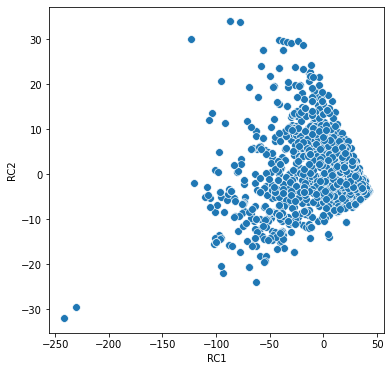

In [13]:

 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'RC1',y = 'RC2' ,  s = 60 )
